# Homework 4: numpy and matplotlib
mkurita@umich

Moeki Kurita

I took 2 hours for problem 1, 3 hours for problem 2, 3 hours for problem 3.

## Submission Instructions

Your homework solutions should be written in this jupyter notebook file. You should submit your solutions via Canvas as a zip file called __yourUniqueName_hwX.zip__, where X is the homework number. So, if I were to hand in a file for homework 4, it would be called __regier_hw4.zip__.

When I extract your compressed file, the result should be a directory, also called __yourUniqueName_hwX__. In that directory, at a minimum, should be a jupyter notebook file, called __yourUniqueName.hwX.ipynb__, where again X is the number of the current homework.
You should feel free to define supplementary functions in other Python scripts, which you should include in your compressed directory.
So, for example, if the code in your notebook file imports a function from a Python file called __supplementary.py__, then the file __supplementary.py__ should be included in your submission. In short, I should be able to extract your archived file and run your notebook file on my own machine by opening it in jupyter and clicking, for example, __Cells->Run__ all. Please ensure that none of the code in your submitted notebook file results in errors. Errors in your code cause problems for our auto-grader. Thus, even though we frequently ask you to check for errors in your functions, you should not include in your submission any examples of your functions
actually raising those errors.

Please include in your notebook file a list of any and all people with whom you discussed this homework assignment. Even if you discussed the assignment with others, your homework submission must not trigger the MOSS plagerism detector. Finally, please also include an estimate of how many hours you spent on each of the sections of this homework assignment.

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import stats

## 1  Warmup: Around the Semicircular Law (6 points)

The (comparatively) young field of random matrix theory (RMT) concerns the behavior of certain matrices with independent random entries.
A landmark result in RMT concerns the behavior of the eigenvalues of a random symmetric matrix with normal entries. Under the proper scaling, the joint distribution of the eigenvalues of such a matrix follows the Wigner semicircular distribution, which has density
\begin{equation} 
f(x) = \begin{cases} \frac{ \sqrt{4-x^2} }{ 2\pi }
			&\mbox{ if } -2 \le x \le 2 \\
		0 &\mbox{ otherwise.} \end{cases}
\end{equation}
That is, a symmetric matrix with random normal entries will have eigenvalues whose histogram looks more and more like a semicircle of radius $2$ as $n$ increases to $\infty$. In particular, define a matrix-valued random variable $Z \in R^{n \times n}$ by generating
$Z_{i,j}$ i.i.d. normal with mean $0$ and variance $1/n$ for all $1 \le i \le j \le n$, and set $Z_{j,i} = Z_{i,j}$ for $1 \le j \le i \le n$. Then the matrix $Z \in R^{n \times n}$ is called a Wigner matrix.

1. Define a function __wigner_density__ that takes a single number (integer or float) as its input and returns a float as its output, given by the value of the semicircular density evaluated at the input. That is, for a number x, __wigner_density(x)__ should return $f(x)$, where $f$ is defined above in the Equation. You do not need to perform any error checking in this function, but note that your function should operate equally well on Python ints/floats and on __numpy__ ints/floats, and you should be able to accomplish this without checking the type of the input. Use the __numpy.sqrt__ function for the square root, not the Python __math.sqrt__ function.

In [3]:
def wigner_density(x):
    if x >= -2 and x <= 2:
        return np.sqrt(4-x**2)/(2*np.pi)
    else:
        return 0

In [4]:
wigner_density(2) == 0

True

2.  Define a function __generate_wigner__ that takes a single positive integer $n$ as its argument and returns a random $n$-by-$n$ Wigner matrix. Your function should raise an appropriate error in the event that the input is not an integer or if it is not positive. The output of your function may be either a __numpy__ matrix or simply a __numpy__ array. I would slightly recommend the former, for ease of use in the next subproblem. You can cast a 2-dimensional __numpy__ array a to a matrix by writing __np.matrix(a)__. __Hint:__ depending on the solution you choose, you may find the __numpy.triu__ and __numpy.tril__ functions to be useful. A different solution makes use of the __scipy.spatial.distance.squareform__ function.

In [5]:
def generate_wigner(n):
    if not isinstance(n, int):
        raise TypeError("Argument must be an integer")
    if n <= 0:
        raise ValueError('Argument must be a positive integer')
    x = np.random.normal(loc=0.0, scale=np.sqrt(1/n), size=(n, n))
    upper = np.triu(x)
    lower = np.tril(x.T)
    diag = np.diag(np.diag(x,))
    return np.matrix(upper + lower - diag)

3. The RMT result referenced above states that the joint distribution of the eigenvalues of a random Wigner matrix converges to the semicircular law. Write a function __get_spectrum__ that takes a __numpy__ matrix or 2-dimensional __numpy__ array and returns a __numpy__ array of its eigenvalues in non-decreasing order. You do not need to perform any error checking for this function. You fill find the following documentation useful: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html#numpy.linalg.eigh.

In [6]:
def get_spectrum(matrix):
    w, v = np.linalg.eigh(matrix)
    return w

In [7]:
print(get_spectrum(np.diag([1, 2, 5])) == np.array([1, 2, 5]))

[ True  True  True]


4. Create a plot with four subplots, arranged vertically, each showing a (normalized) histogram, in blue, of the eigenvalues of a
	random $n$-by-$n$ Wigner matrix for $n=100,200,500$ and $1000$. In each subplot, overlay a red curve indicating the density of the
	semicircular law, as defined in the Equation.

	__Hint:__ depending on how you implemented __wigner_density__ above, you may find the __numpy.vectorize__ function helpful.

	How big does $n$ have to be before the semicircular law appears to be a good fit? Of course, in practice, we would answer this question more rigorously with, for example, a Kolmogorov-Smirnov test, which you can find in the __scipy.stats__ module, but that is entirely optional. __Note:__ this experiment involves some matrix eigenvalue computations, which are comparatively expensive. If you set $n$ larger than about $5000$, be prepared to wait a few minutes for your answer, especially if you are running on a laptop.

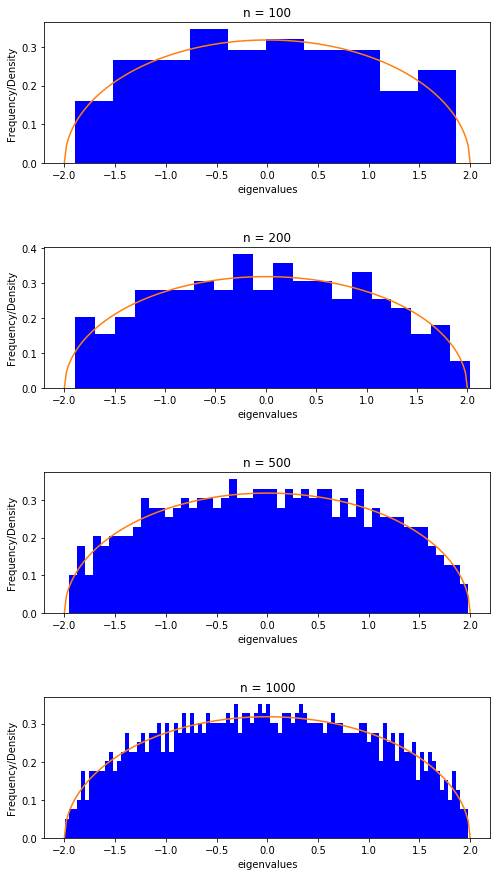

In [8]:
# Preparation
n_to_be_tested = [100, 200, 500, 1000]
x_for_wigner = np.linspace(-2, 2, 200)
wrapped_wigner_density = np.vectorize(wigner_density)
y_for_wigner = wrapped_wigner_density(x_for_wigner)

# Aesthetics of Plot
plt.figure(1, figsize=(8, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Generating Plot
for i in range(len(n_to_be_tested)):
    plt.subplot(len(n_to_be_tested), 1, i+1)
    # Histgram
    plt.hist(get_spectrum(generate_wigner(n_to_be_tested[i])),
             bins=int(n_to_be_tested[i]/10), facecolor='b', density=True)
    plt.xlabel('eigenvalues')
    plt.ylabel('Frequency/Density')
    plt.title('n = %d' % n_to_be_tested[i])
    # Density Overlay
    plt.plot(x_for_wigner, y_for_wigner)
plt.show()

From the plots above, we can see that even when $n = 200$, it appears to be a relatively good fit. But for $n\geq500$, we have much better fit.

## 2 Plotting a Mixture of Normals (6 points)
The whole reason that we use plotting software is to visualize the data that we are working with, so let's do that. The file __points.dlm__ is a tab-delimited file (__.dlm__ stands for “delimited”). Such a format is common when writing reasonably small files, and is useful if you expect to use a data set across different programs or platforms. See the documentation for the command __numpy.loadtxt__ to see how
to read this file. The file __labels.npy__ is a numpy binary file, representing a __numpy__ object. The __.npy__ file format is specific to __numpy__. Many languages (e.g., R and MATLAB) have their own such language-specific file formats for saving variables, workspaces, etc. These formats tend to be more space-efficient, typically at the cost of program-dependence. It is best to avoid such files if you expect to deal with the same data set in several different environments (e.g., you run experiments in MATLAB and do your statistical analysis in R). __.npy__ files are opened using __numpy.load__. 

The observations in my experiment were generated from a distribution that is _approximately_ normal, but not precisely so. Let's explore how well the normal approximation holds.

1. Download the .npy and .dlm file, and read the two files into __numpy__. Please include both __labels.npy__ and __points.dlm__ in your final submission. The former of these should yield a __numpy__ array of $0$s and $1$s, and the latter should yield a $100$-by-$2$ __numpy__ array, in which each row corresponds to a $2$-dimensional point. The $i$-th entry of the array in __labels.npy__ corresponds to the cluster membership label of the $i$-th row of the matrix stored in __points.dlm__.

In [9]:
points = np.loadtxt(fname="points.dlm")
labels = np.load("labels.npy")

2. Generate a scatter plot of the data. Each data point should appear as an __x__ (often called a _cross_ in data visualization packages), colored according to its cluster membership as given by __points.npy__. The points with cluster label $0$ should be colored blue, and those with cluster label $1$ should be colored red. Set the x and y axes to both range from 0 to 1. Adjust the size of the point markers to what you believe to be reasonable (i.e., aesthetically pleasing, visible, etc).

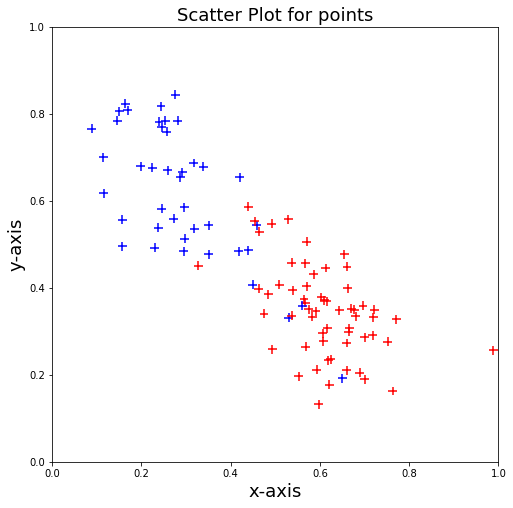

In [10]:
plt.figure(2, figsize=(8, 8))
colors = ['blue', 'red']
cmap = ListedColormap(colors)
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap, s=80, marker="+")
plt.xlabel('x-axis', fontsize=18)
plt.ylabel('y-axis', fontsize=18)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Scatter Plot for points', fontsize=18)
plt.show()

3. Theoretically, the data should approximate a mixture of normals with means and covariance matrices given by 
$$ \mu_0 = (0.2 , 0.7)^T,
        \Sigma_0 = \begin{bmatrix} 0.015 & -0.011 \\
                          -0.011  & 0.018 
                          \end{bmatrix}, $$
$$ \mu_1 = (0.65, 0.3)^T,
        \Sigma_1 = \begin{bmatrix} 0.016 & -0.011 \\
                          -0.011 & 0.016 
                          \end{bmatrix}. $$
For each of these two normal distributions, add two contour lines corresponding to 1 and 2 "standard deviations" of the distribution. We will take the 1-standard deviation contour to be the level set (which is an ellipse) of the normal distribution that encloses probability mass 0.68 of the distribution, and the 2-standard deviation contour to be the level set that encloses probability mass 0.95 of the distribution. The contour lines for cluster $0$ should be colored blue, and the lines for cluster $1$ should be colored red. The contour lines will go off the edge of the 1-by-1 square that we have plotted. Do not worry about that. __Hint:__ these ellipses are really just confidence regions given by
$$ (x-\mu)^T \Sigma^{-1} (x - \mu) \le \chi^2_2(p), $$
where $p$ is a probability and $\chi^2_d$ is the quantile function for the $\chi^2$ distribution with $d$ degrees of freedom. __Hint:__ use the optional argument __levels__ for the __pyplot.contour__ function.

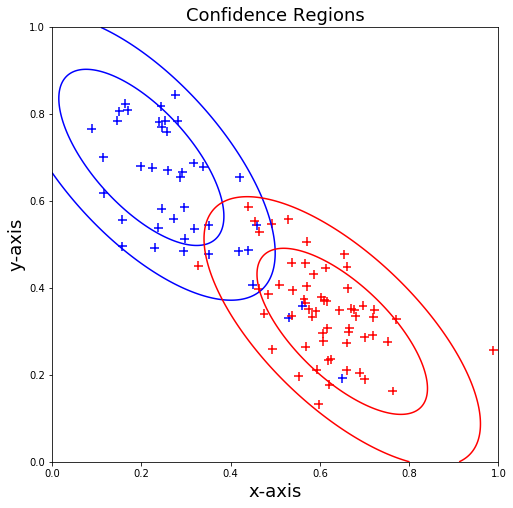

In [11]:
# Chi distribution
chi68 = stats.chi2.ppf(0.68, 2)
chi95 = stats.chi2.ppf(0.95, 2)
# Cluster 0 Distribution
mu0 = np.array([0.2, 0.7])
sigma0 = np.array([0.015, -0.011, -0.011, 0.018]).reshape(2, 2)
det_sigma0 = np.linalg.det(sigma0)
c0_z = stats.multivariate_normal(mu0, sigma0)
# Cluster 1 Distribution
mu1 = np.array([0.65, 0.3])
sigma1 = np.array([0.016, -0.011, -0.011, 0.016]).reshape(2, 2)
det_sigma1 = np.linalg.det(sigma1)
c1_z = stats.multivariate_normal(mu1, sigma1)

# Derive levels for Cluster 0
c0_z1 = np.exp(-chi68/2)/((2*np.pi)*np.sqrt(det_sigma0))
c0_z2 = np.exp(-chi95/2)/((2*np.pi)*np.sqrt(det_sigma0))
# Derive levels for Cluster 1
c1_z1 = np.exp(-chi68/2)/((2*np.pi)*np.sqrt(det_sigma1))
c1_z2 = np.exp(-chi95/2)/((2*np.pi)*np.sqrt(det_sigma1))

# Generate a New Plot
# Scatter of points (same as previous problem)
plt.figure(3, figsize=(8, 8))
colors = ['blue', 'red']
cmap = ListedColormap(colors)
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap, s=80, marker="+")
plt.xlim(0, 1)
plt.ylim(0, 1)
# contours
x, y = np.mgrid[0:1:.001, 0:1:.001]
pos = np.dstack((x, y))
plt.contour(x, y, c0_z.pdf(pos), levels=sorted([c0_z1, c0_z2]), colors='blue')
plt.contour(x, y, c1_z.pdf(pos), levels=sorted([c1_z1, c1_z2]), colors='red')
# Title, Labels, etc.
plt.title('Confidence Regions', fontsize=18)
plt.xlabel('x-axis', fontsize=18)
plt.ylabel('y-axis', fontsize=18)
plt.show()

4. Do the data appear normal? There should be at least one obvious outlier. Add an annotation to your figure indicating one or more such outlier(s).

Answer: Most of the points are inside the $2σ$ ellipses, and therefore we can see the data follows normal distributions. In this problem, we will treat points which are $3σ$ away from the mean as outliers, and add an annotation for each point as follows.

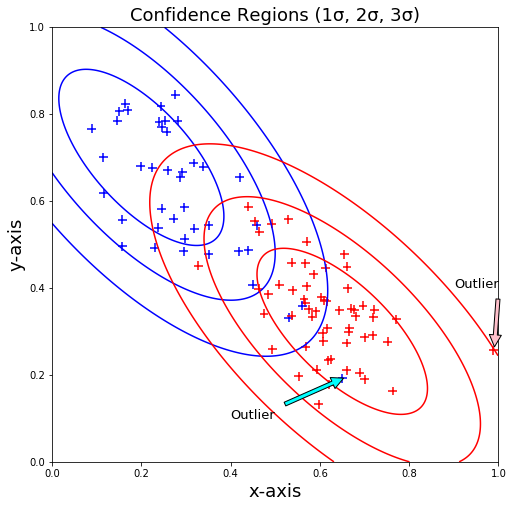

In [12]:
# Add an annotation to your figure indicating one or more such outlier(s):
# Regenerate the Plot
plt.figure(4, figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap, s=80, marker="+")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Confidence Regions (1σ, 2σ, 3σ)', fontsize=18)
plt.xlabel('x-axis', fontsize=18)
plt.ylabel('y-axis', fontsize=18)
# 99% contour
chi99 = stats.chi2.ppf(0.997, 2)
c0_z3 = np.exp(-chi99/2)/((2*np.pi)*np.sqrt(det_sigma0))
c1_z3 = np.exp(-chi99/2)/((2*np.pi)*np.sqrt(det_sigma1))
plt.contour(x, y, c0_z.pdf(pos), levels=sorted(
    [c0_z1, c0_z2, c0_z3]), colors='blue')
plt.contour(x, y, c1_z.pdf(pos), levels=sorted(
    [c1_z1, c1_z2, c1_z3]), colors='red')
# Annotation
plt.annotate('Outlier', xy=(0.99, 0.25), xytext=(0.9, 0.4), fontsize=13,
             arrowprops=dict(facecolor='pink', shrink=0.1),)
plt.annotate('Outlier', xy=(0.67, 0.2), xytext=(0.4, 0.1), fontsize=13,
             arrowprops=dict(facecolor='cyan', shrink=0.1),)
plt.show()

We spotted two points outside $3σ$ ellipses.

More precisely, the red point on the border is inside the ellipse (as shown below), but we treat this case as outlier too because this point is extremely close to the contour and separated from the other red points.

In [13]:
print(c1_z.pdf((0.98788763, 0.25612301)) > c1_z3)

True


## 3. Conway's Game of Life (8 points)
Conway's Game of Life (__https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life__) is a classic example of a _cellular automaton_ devised by mathematician John Conway. The game is a classic example of how simple rules can give rise to complex behavior. The game is played on an $m$-by-$n$ board, which we will represent as an $m$-by-$n$ matrix. The game proceeds in steps. At any given time, each cell of the board (i.e., entry of our matrix), is either alive (which we will represent as a $1$) or dead (which we will represent as a $0$).
At each step, the board evolves according to a few simple rules:

- A live cell with fewer than two live neighbors becomes a dead cell.
- A live cell with more than three live neighbors becomes a dead cell.
- A live cell with two or three live neighbors remains alive.
- A dead cell with _exactly_ three live neighbors becomes alive.
- All other dead cells remain dead.

The neighbors of a cell are the 8 cells adjacent to it, i.e., left, right, above, below, upper-left, lower-left, upper-right and lower-right. We will follow the convention that the board is _toroidal_, so that using matrix-like notation (i.e., the cell $(0,0)$ is in the upper-left of the board and the first coordinate specifies a row), the upper neighbor of the cell $(0,0)$ is $(m-1,0)$, the right neighbor of the cell $(m-1,n-1)$ is $(m-1,0)$, etc. That is, the board "wraps around". __Note:__ you are not required to use this matrix-like indexing. It's just what I chose to use to explain the toroidal property.

1. Write a function __is_valid_board__ that takes an $m$-by-$n$ __numpy__ array (i.e., an __ndarray__) as its only argument and returns a Python Boolean that is __True__ if and only if the argument is a valid representation of a Game of Life board. A valid board is any two-dimensional numpy __ndarray__ of integers with all entries either 0 or 1.

In [14]:
def is_valid_board(array):
    if not isinstance(array, np.ndarray):
        return False
    elif array.ndim != 2:
        return False
    elif np.all((array == 0.0) + (array == 1.0)):
        return True
    else:
        return False

In [15]:
[is_valid_board(np.array([1, 1, 1, 1]).reshape(2, 2)) == (True),
 is_valid_board(np.array([1, 1, 1, 1.1]).reshape(2, 2)) == (False)]

[True, True]

2. Write a function called __gol_step__ that takes an $m$-by-$n$ __numpy__ array as its argument and returns another __numpy__ array of the same size (i.e., also $m$-by-$n$), corresponding to the board at the next step of the game. Your function should perform error checking to ensure that the provided argument is a valid Game of Life board.

In [16]:
def count_lives(pos, array):
    center = array[pos]
    # collect neighbor cells
    adj_rows = np.take(
        array, [pos[0]-1, pos[0], pos[0]+1], axis=0, mode='wrap')
    adj_block = np.take(
        adj_rows, [pos[1]-1, pos[1], pos[1]+1], axis=1, mode='wrap')
    # count 1s
    n_live_cells = adj_block[adj_block == 1].size - center
    return n_live_cells


def gol_step(past_board):
    if not is_valid_board(past_board):
        raise ValueError("Given board not valid")
    future = past_board.copy()
    for pos, value in np.ndenumerate(past_board):
        if value == 1:
            if (count_lives(pos, past_board) != 2
                    and count_lives(pos, past_board) != 3):
                future[pos] = 0
        if value == 0:
            if count_lives(pos, past_board) == 3:
                future[pos] = 1
    return future

In [17]:
myboard = np.array([1, 1, 1, 1,
                    0, 0, 0, 1,
                    0, 0, 0, 0,
                    0, 1, 0, 0]).reshape(4, 4)
myboardans = np.array([0, 1, 0, 1,
                       0, 1, 0, 1,
                       0, 0, 0, 0,
                       0, 1, 0, 1]).reshape(4, 4)

(gol_step(myboard) == myboardans).all()

True

3. Write a function called __draw_gol_board__ that takes an $m$-by-$n$ __numpy__ array (i.e., an __ndarray__) as its only argument and draws the board as an $m$-by-$n$ set of tiles, colored black or white correspond to whether the corresponding cell is alive or dead, respectively. Your plot should _not_ have any grid lines, nor should it have any axis labels or axis ticks. __Hint:__ see the functions __plt.xticks()__ and __plt.yticks()__ for changing axis ticks. __Hint:__ you may find the function __plt.get_cmap__ to be useful for working with the __matplotlib__ __Colormap__ objects.

In [18]:
def draw_gol_board(array):
    if not is_valid_board(array):
        raise ValueError("Given board not valid")
    # Set colors
    colors = ['white', 'black']
    cmap = ListedColormap(colors)
    # Generate plot
    plt.imshow(array, cmap=cmap)
    plt.xticks([])
    plt.yticks([])

4. Create a 20-by-20 numpy array corresponding to a Game of Life board in which all cells are dead, with the exception that the top-left 5-by-5 section of the board looks like this: 
<img src="./glider.png">
Plot this 20-by-20 board using __draw_gol_board__.

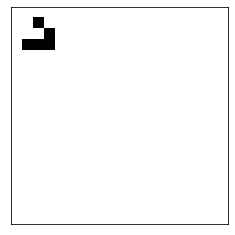

In [19]:
twenty = np.zeros((20, 20))
top_left_block = np.array([[0, 1, 0],
                           [0, 0, 1],
                           [1, 1, 1]])
twenty[1:4, 1:4] = top_left_block
draw_gol_board(twenty)

5. Generate a plot with 5 subplots, arranged in a 1-by-5 grid (i.e., horizontal array of 5 subplots), showing the first five steps of the Game of Life when started with the board you just created, with the steps ordered from left to right. The first plot should be the starting board just described, so that the first plot is the state of the board before we execute any steps. The figure in the 5-by-5 sub-board above is called a _glider_, and it is interesting in that, as you can see from your plot, it seems to move along the board as you run the game.

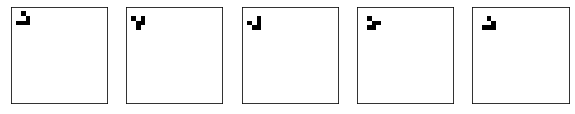

In [20]:
# Preparation
x = twenty.copy()
n_steps = 5
# Aesthetics of Plot
plt.figure(5, figsize=(10, 8))
# Generating Plot
for i in range(n_steps):
    plt.subplot(1, n_steps, i+1)
    # Draw current state
    draw_gol_board(x)
    # One Step Forward
    x = gol_step(x)

__Optional additional exercise:__ create a function that takes two arguments, a Game of Life board and a number of steps, and generates an animation of the game as it runs for the given number of steps.